In [1]:
import numpy as np
import sys 
import os
import shutil
import matplotlib.pyplot as plt
import scipy.interpolate as sp
import ipyvolume as ipv
sys.path.append('/home/giorgiod/Documents/APDFT/dep')
sys.path.append('/home/giorgiod/Documents/APDFT/src')

In [2]:
from apdft import Calculator

In [3]:
proj_path='/home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/'
os.listdir(proj_path)

['def2-QZVPP',
 'LiNa_fixed_scf',
 '631G*',
 'def2-TZVP',
 'sto3G',
 'sto6G',
 '321G',
 'cc-pVTZ',
 'aug-cc-pVQZ',
 'LiNa-def2TZVP-rerun']

In [4]:
basisSets=[ 'def2-TZVP','def2-QZVPP', 'sto3G', 'sto6G', '321G','631G*','cc-pVTZ','aug-cc-pVQZ']
molecules=['NN','CO','BF','BeNe','LiNa','HeMg','HAl']
alchemy=[-2,-1,0,1,2]
points= np.linspace(1.30,3.20,20)
def dirName(basis_set,molecule,point,alchemy=0):
    return proj_path+basis_set+'/'+molecule+"/A{}_Radius:{}".format(alchemy,str(point)[0:3])+'/'
print (os.path.isdir(dirName(basisSets[3],molecules[2],points[3])))
print (dirName(basisSets[3],molecules[2],points[3]))

True
/home/giorgiod/MRCC_interface/PES-BS-ALCHEMY/sto6G/BF/A0_Radius:1.6/


In [5]:
def parse_energy_cc(log_file):
    """Parse the couple cluster energy from an MRCC output file"""
    try:
        with open(log_file,'r') as logf:
            while True:
                line=logf.readline()
                if "Final results:" in line:
                    good_line=logf.readline()
                    if "Total CCSD energy" in good_line:
                        for x in good_line.split(' '):
                            try:
                                float(x)
                                return (float(x))
                            except:
                                pass    
    except:
        print('couldn\'t parse energy return 0 for: '+log_file)
        return 0

In [6]:
def energy(bs,mol,pt,al=0):
    return parse_energy_cc(dirName(bs,mol,pt,al)+'run.log')

In [7]:
def parse_energy_hf(log_file):
    """Parse the hartree Fock energy from an MRCC output file"""
    try:
        with open(log_file,'r') as logf:
            while True:
                line=logf.readline()
                if "FINAL HARTREE-FOCK ENERGY:" in line:
                    good_line=line
                    for x in good_line.split(' '):
                        try:
                            float(x)
                            return (float(x))
                        except:
                            pass    
    except:
        print('couldn\'t parse energy return 0 for: '+log_file)
        return 0

In [8]:
def energy_hf(bs,mol,pt,al=0):
    return parse_energy_hf(dirName(bs,mol,pt,al)+'run.log')

In [9]:
energy_hf('sto6G','HAl',2.2)

-241.3704735798517

In [10]:
#for bs in basisSets:
#    for mol in molecules:
#        print (energy(bs,mol,2.1))
    #    print (dirName(bs,mol,2.1))

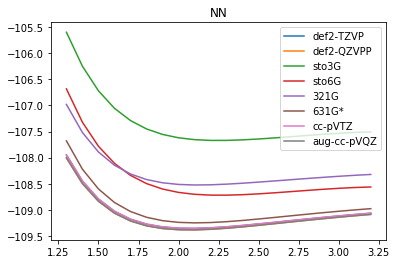

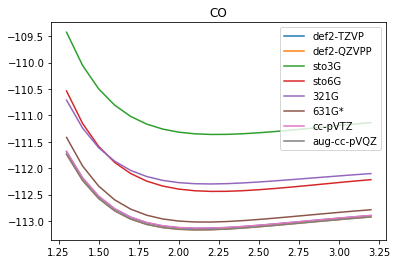

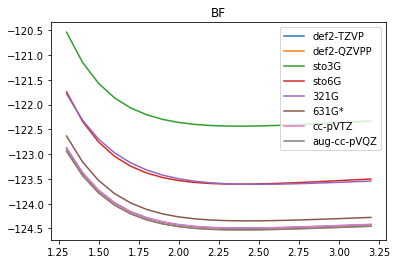

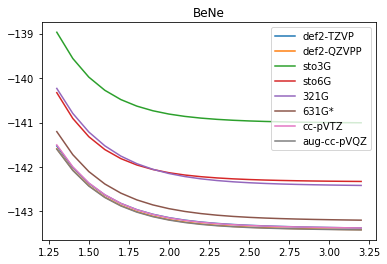

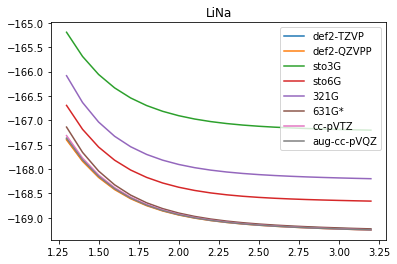

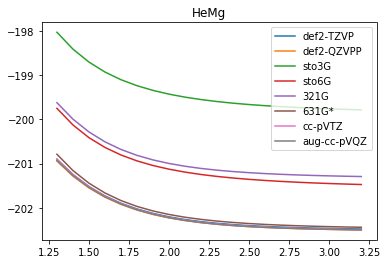

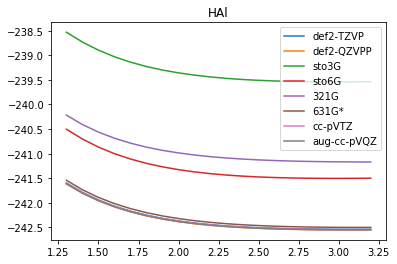

In [11]:
# Overview of all molecules all BS at 0th order alchemy (or a given one)
for mol in molecules:
    for bs in basisSets:
        plt.plot(points,[energy(bs,mol,pt,0) for pt in points],label=bs)
    plt.title(mol)
    plt.legend()
    plt.show()

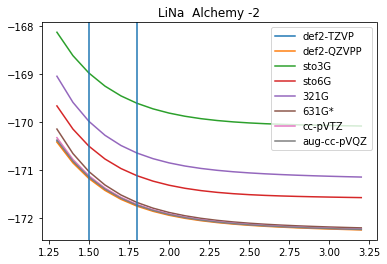

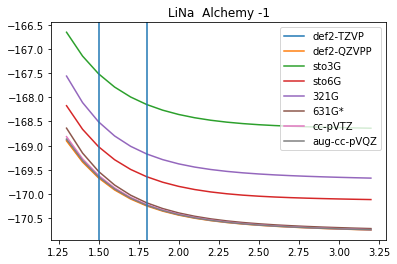

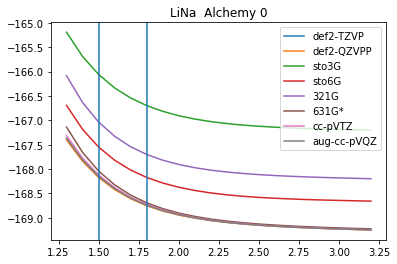

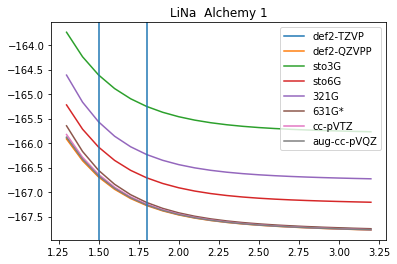

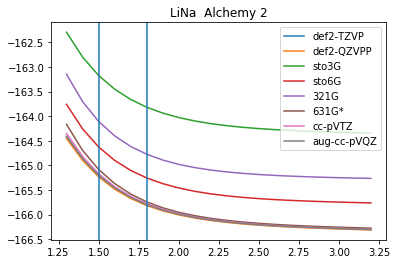

In [81]:
# CC energies for LiNa
for ao in range(-2,3):
    for bs in basisSets:
        plt.plot(points,[energy(bs,'LiNa',pt,ao) for pt in points],label=bs)
    plt.title('LiNa '+' Alchemy '+ str(ao))
    plt.axvline(1.5)
    plt.axvline(1.8)
    plt.legend()
    plt.show()

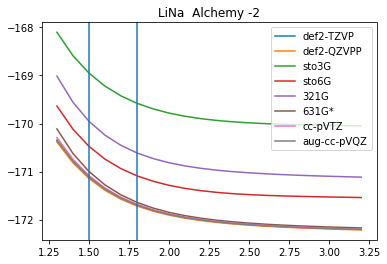

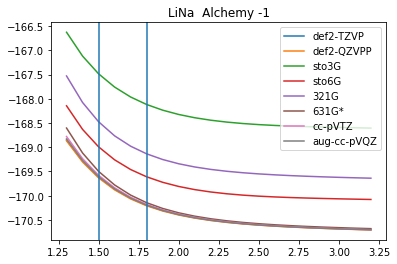

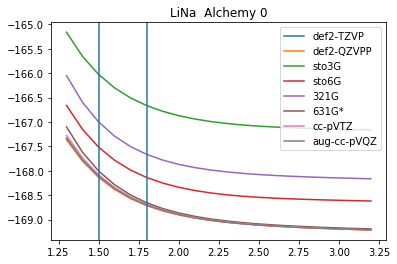

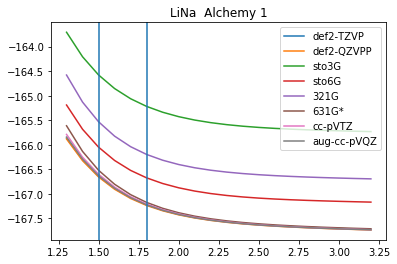

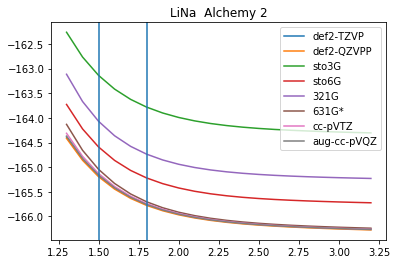

In [79]:
# On LiNa Hartree Fock energies
for ao in range(-2,3):
    for bs in basisSets:
        plt.plot(points,[energy_hf(bs,'LiNa',pt,ao) for pt in points],label=bs)
    plt.title('LiNa '+' Alchemy '+ str(ao))
    plt.axvline(1.5)
    plt.axvline(1.8)
    plt.legend()
    plt.show()

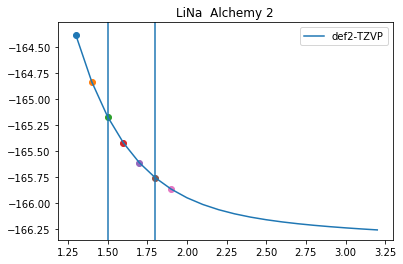

In [80]:
ao=2
plt.plot(points,[energy_hf('def2-TZVP','LiNa',pt,ao) for pt in points],label='def2-TZVP')
plt.scatter(1.3,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.3/run.log'))
plt.scatter(1.4,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.4/run.log'))
plt.scatter(1.5,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.5/run.log'))
plt.scatter(1.6,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.6/run.log'))
plt.scatter(1.7,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.7/run.log'))
plt.scatter(1.8,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.8/run.log'))
plt.scatter(1.9,parse_energy_hf(proj_path+'/LiNa-def2TZVP-rerun/A'+str(ao)+'_Radius:1.9/run.log'))

plt.title('LiNa '+' Alchemy '+str(ao))
plt.axvline(1.5)
plt.axvline(1.8)
plt.legend()
plt.show()

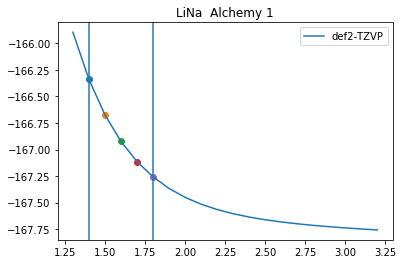

In [78]:
ao=1
plt.plot(points,[energy('def2-TZVP','LiNa',pt,ao) for pt in points],label='def2-TZVP')
#plt.scatter(1.3,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.3/run.log'))
plt.scatter(1.4,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.4/run.log'))
plt.scatter(1.5,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.5/run.log'))
plt.scatter(1.6,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.6/run.log'))
plt.scatter(1.7,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.7/run.log'))
plt.scatter(1.8,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.8/run.log'))
#plt.scatter(1.9,parse_energy_cc(proj_path+'/LiNa_fixed_scf/A'+str(ao)+'_Radius:1.9/run.log'))

plt.title('LiNa '+' Alchemy '+str(ao))
plt.axvline(1.4)
plt.axvline(1.8)
plt.legend()
plt.show()

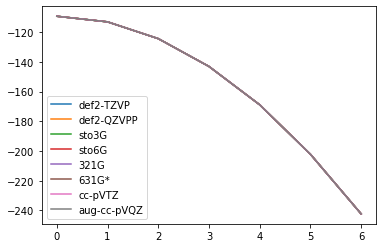

In [15]:
for bs in basisSets: 
    apes=[]
    for mol in molecules:
        apes.append(energy('cc-pVTZ',mol,2.))
    plt.plot(apes,label=bs)
plt.legend()

# get minimun and vibrational frequency

In [16]:
nn_scan=np.asarray([energy('def2-TZVP','NN',pt) for pt in points])
NN_spline_pes=np.linspace (1.3,3.2,1000) # points 20 in 1.3-3.2 (1.9bohrs)
NN_spline=sp.spline(points,nn_scan,NN_spline_pes, order=3)
m=NN_spline.argmin()
k=(NN_spline[m+1]+NN_spline[m-1]-2*NN_spline[m])/(1.9e-3)**2
Rmin=1.3+m*1.9e-3

/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
mu_nn=12766.4683422
lightspeed=137.035999753
planck=6.28318530718
centimeter=188972613.392
def to_cm(k,Mu):
    return (k/Mu)**0.5*centimeter/planck/lightspeed

In [18]:
to_cm(k,mu_nn),Rmin

(2435.177842315386, 2.0695)

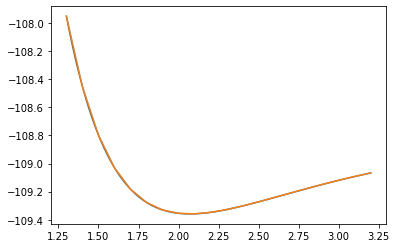

In [19]:
plt.plot(NN_spline_pes,NN_spline)
plt.plot(points,nn_scan)

In [20]:
def sppes(bs,mol,ao=0):
    points=np.linspace(1.3,3.2,20)
    scan=np.asarray([energy(bs,mol,pt) for pt in points])
    target_pts=np.linspace (1.3,3.2,1000) # points 20 in 1.3-3.2 (1.9bohrs)
    return sp.spline(points,nn_scan,target_pts, order=3)

In [21]:
def get_grid(basis_set,molecule,point,alchemy=0):
    return (Calculator.MrccCalculator.get_grid(None, None, dirName(basis_set,molecule,point,alchemy=0)))
def get_ccdensity(basis_set,molecule,point,alchemy=0):
    return Calculator.MrccCalculator.density_on_grid(dirName(basis_set,molecule,point,alchemy=0)+'DENSITY',get_grid(basis_set,molecule,point,alchemy=0)[0])